## Problem Statement - 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Reading the dataset

housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Understanding the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Shape of the dataset

housing.shape

(1460, 81)

In [5]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Checking for null values

housing.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [7]:
#Statistical description of the dataset

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Dropping columns with more than 40% missing values

housing = housing.drop(['Alley'], axis = 1)
housing = housing.drop(['PoolQC'], axis = 1)
housing = housing.drop(['Fence'], axis = 1)
housing = housing.drop(['MiscFeature'], axis = 1)
housing = housing.drop(['FireplaceQu'], axis = 1)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
#Imputing missing values with median

missingcolumns = ['LotFrontage','MasVnrArea']
 
for i in missingcolumns:
 housing.loc[housing.loc[:,i].isnull(),i]=housing.loc[:,i].median()

In [11]:
housing.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
housing.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Text(0.5, 1.0, 'Sale Price Vs Neighborhood')

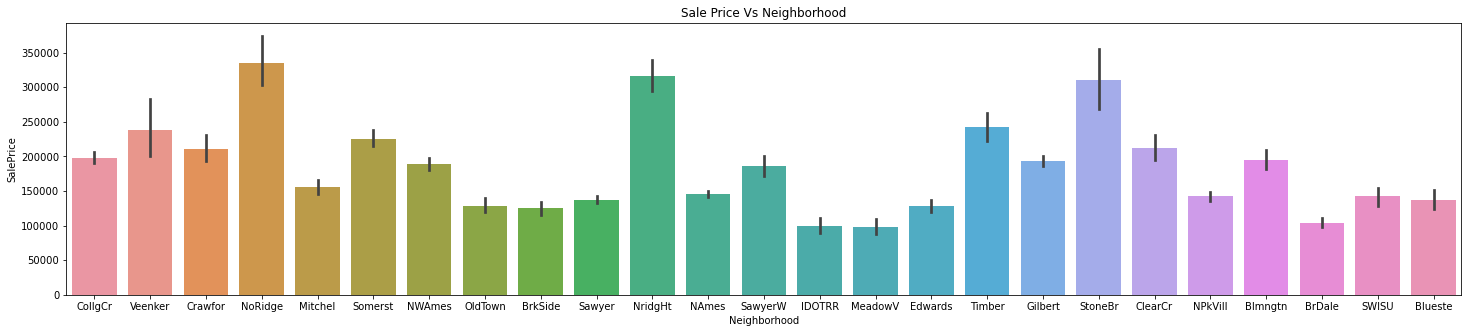

In [20]:
#Visualization: plotting bar graph between Sale Price vs Neighborhood

plt.figure(figsize=(25, 5))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing)
plt.title("Sale Price Vs Neighborhood")

Text(0.5, 1.0, 'Sale Price Vs HouseStyle')

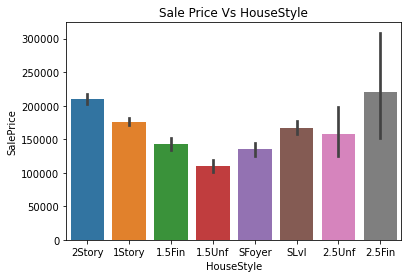

In [19]:
#Visualization: plotting bar graph between Sale Price vs housing type

sns.barplot(x="HouseStyle", y="SalePrice", data= housing)
plt.title("Sale Price Vs HouseStyle")

Text(0.5, 1.0, 'Sale Price Vs BldgType')

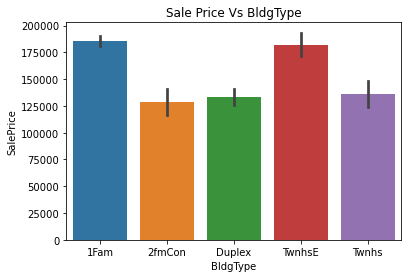

In [18]:
#Visualization: plotting bar graph between Sale Price vs BldgType

sns.barplot(x="BldgType", y="SalePrice", data= housing)
plt.title("Sale Price Vs BldgType")

Text(0.5, 1.0, 'Sale Price VS OverallQual')

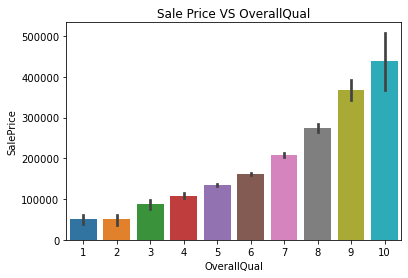

In [21]:
#Visualization: plotting bar graph between Sale Price vs OverallQual

sns.barplot(x="OverallQual", y="SalePrice", data= housing)
plt.title("Sale Price VS OverallQual")

Text(0.5, 1.0, 'Sale Price VS OverallCond')

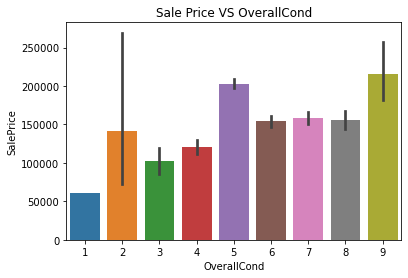

In [22]:
#Visualization: plotting bar graph between Sale Price vs OverallQual

sns.barplot(x="OverallCond", y="SalePrice", data= housing)
plt.title("Sale Price VS OverallCond")

In [23]:
housing_numeric = housing.select_dtypes(include=np.number)
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
#Removing column Id

housing_numeric = housing_numeric.drop(['Id'], axis=1)
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [28]:
#Correlation Matrix

housing_numeric.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


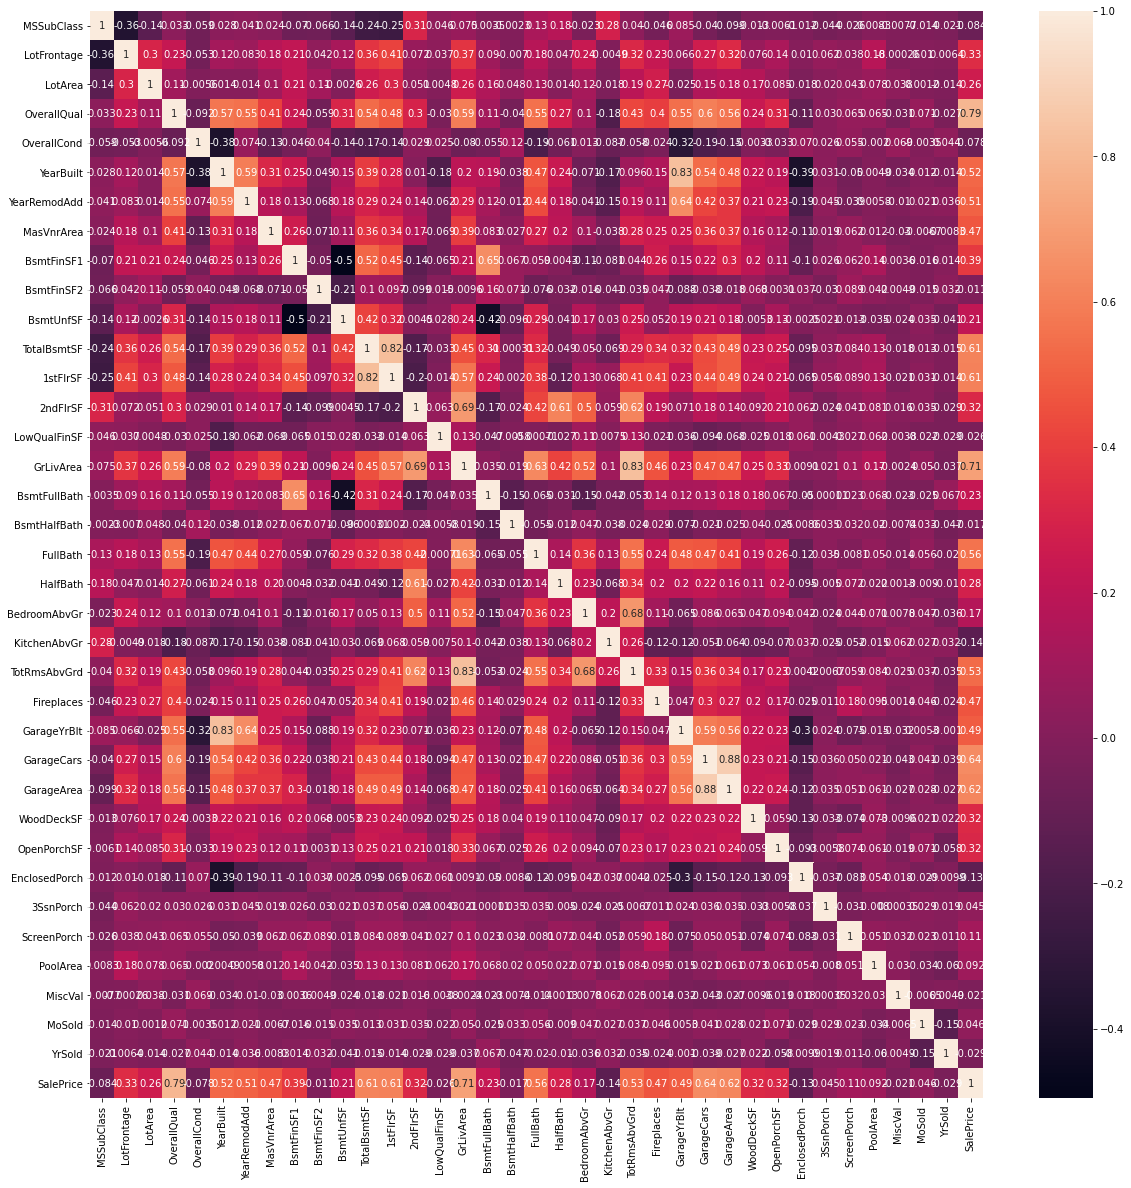

In [31]:
#Heatmap

corr = housing_numeric.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


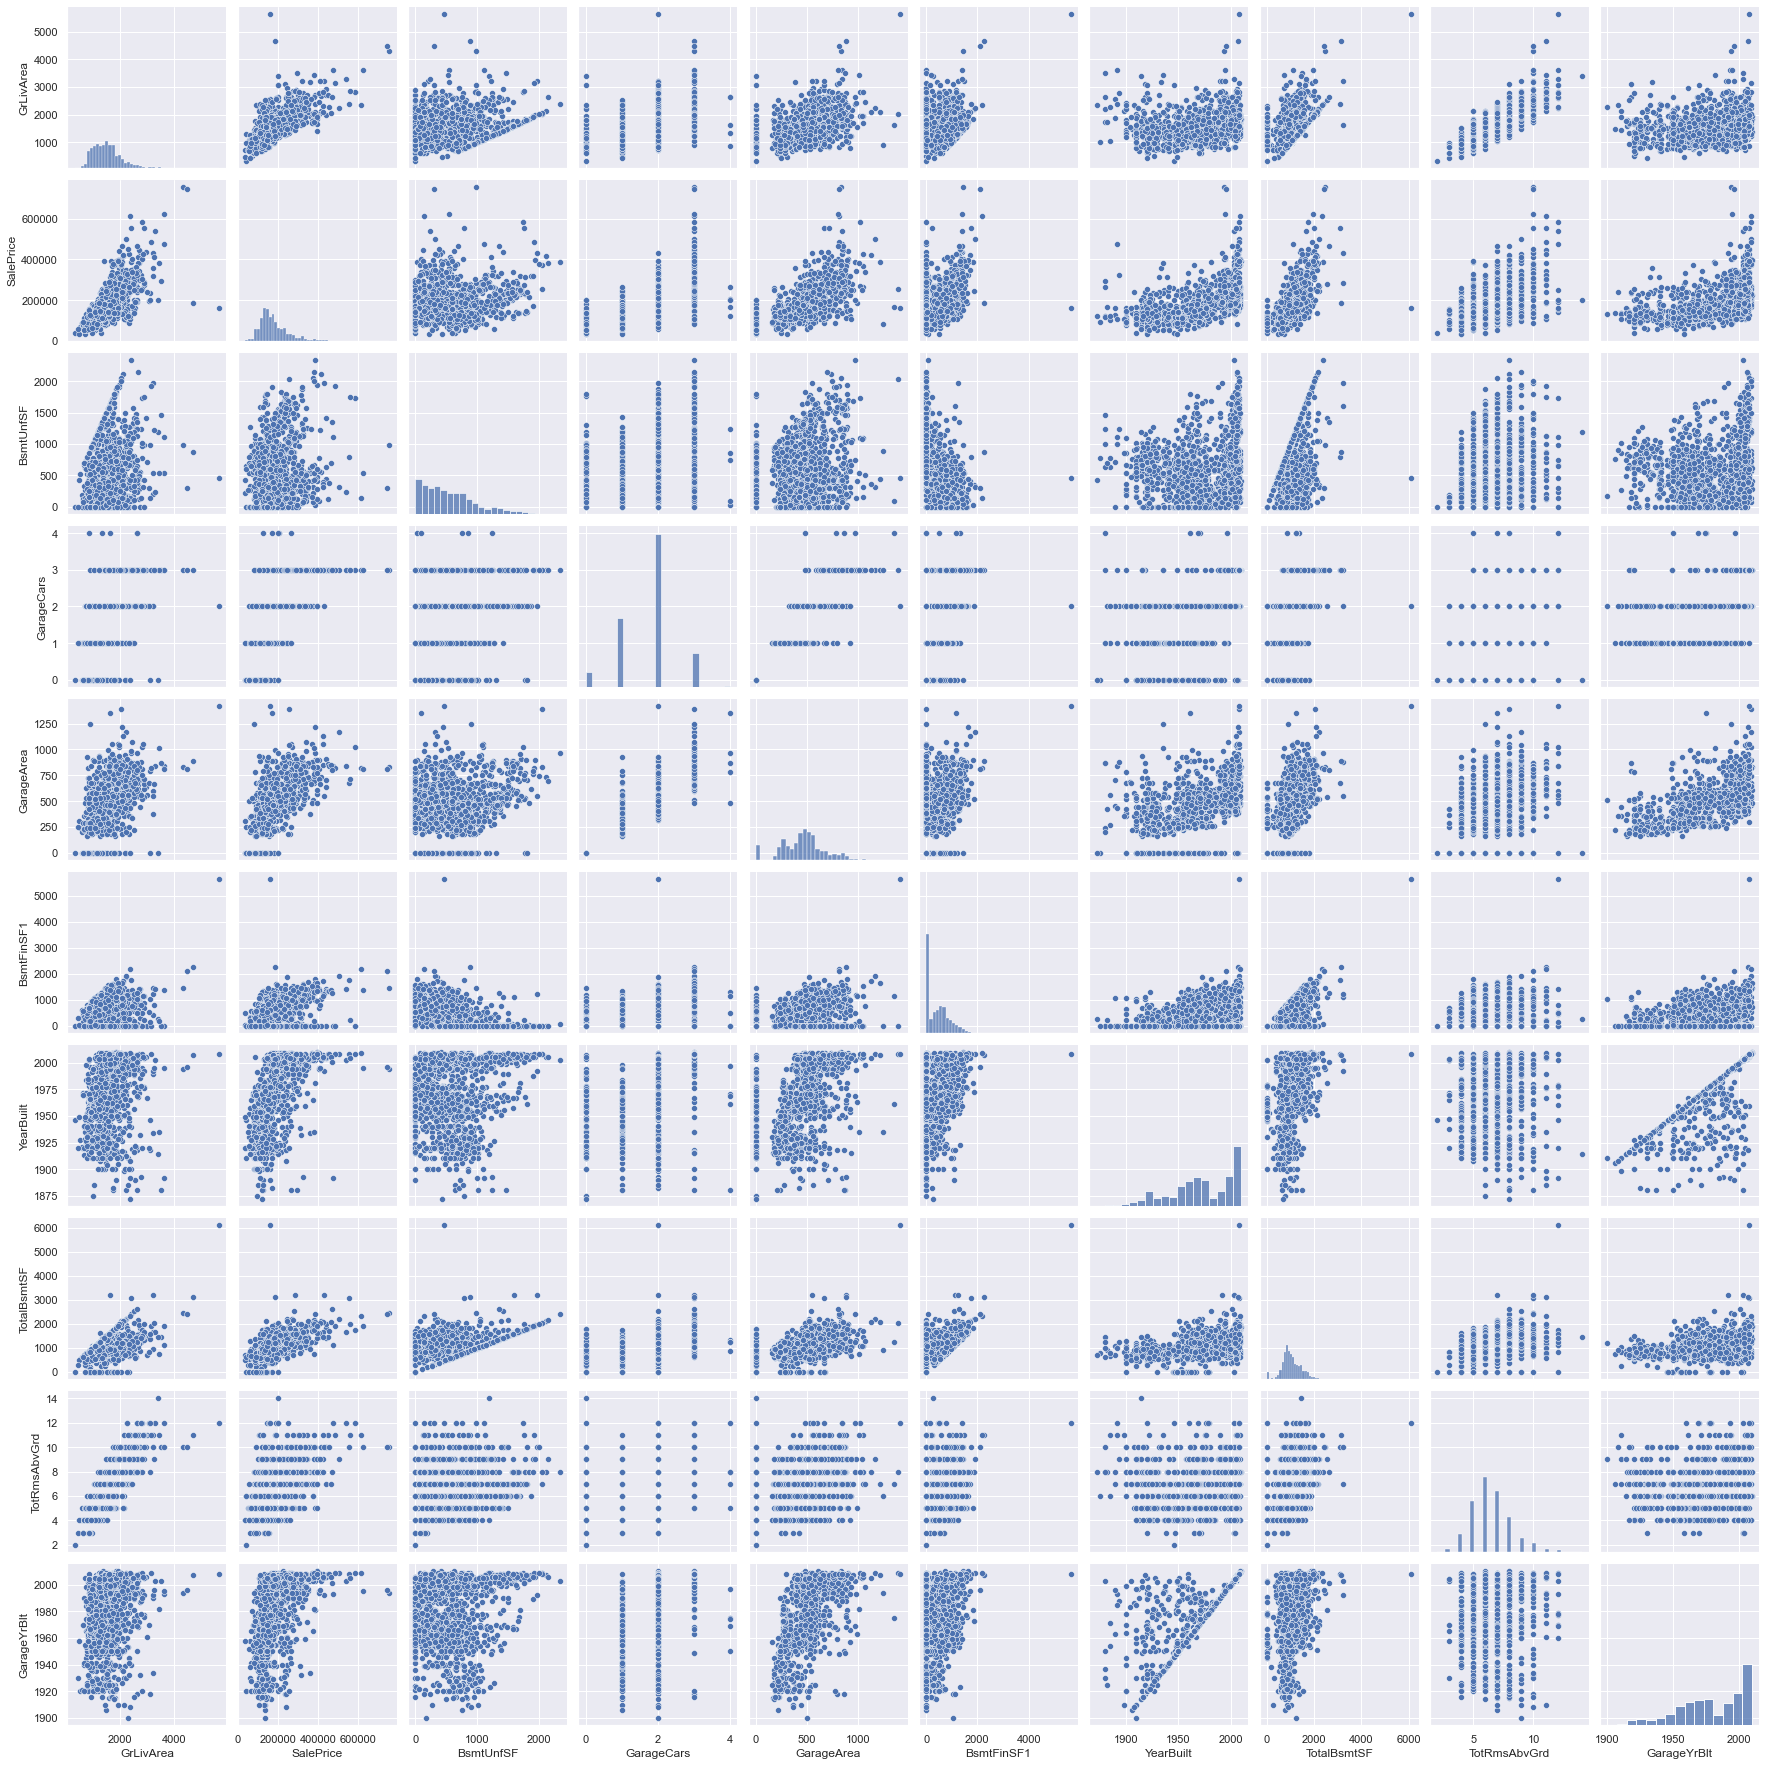

In [32]:
#Analysing Variables that have high correlation with each other

sns.set()
columns = ['GrLivArea', 'SalePrice', 'BsmtUnfSF', 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'YearBuilt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_numeric[columns], size = 2.5)
plt.show()

In [33]:
#removing unnecessary variables
housing = housing.drop(['GarageYrBlt'], axis = 1)
housing = housing.drop(['GarageCars'], axis = 1)
housing = housing.drop(['TotRmsAbvGrd'], axis = 1)
housing = housing.drop(['BsmtUnfSF'], axis = 1)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

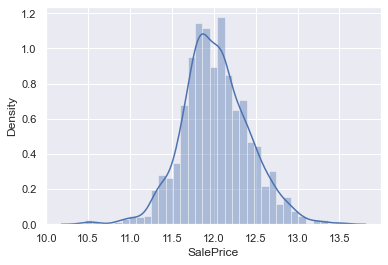

In [36]:
#Distribution of Sale Price 

sns.distplot(np.log1p(housing['SalePrice']))

In [37]:
housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                                           
housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [38]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
categorical = housing.select_dtypes(include=['object'])
categorical.head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal


In [40]:
#Converting categorical variables into dummies
dummies_df = pd.get_dummies(categorical, drop_first=True)
dummies_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [41]:
#Removing column Id

housing = housing.drop(['Id'],axis=1)

In [42]:
#Adding the dummy categorical column in place of the original categorical column

housing = housing.drop(list(categorical.columns), axis=1)
housing = pd.concat([housing,dummies_df], axis=1)

In [43]:
housing.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [44]:
#Train-Test Split

housing_train,housing_test = train_test_split(housing, train_size=0.7,test_size = 0.3, random_state=100)

In [45]:
#transforming the target data

y_train = np.log(housing_train.SalePrice)
X_train = housing_train.drop("SalePrice",1)

y_test= np.log(housing_test.SalePrice)
X_test = housing_test.drop("SalePrice",1)

In [48]:
#Scaling the data

numerical_col = X_train.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.transform(X_test[numerical_col])

In [49]:
#Building the model - Regression Model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
#calculating RFE

rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [51]:
col = X_train.columns[rfe.support_]
X_train_new = X_train[col]
X_train_new  = sm.add_constant(X_train_new)
lr=sm.OLS(y_train,X_train_new)

In [52]:
lr_model=lr.fit()

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     490.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:28:59   Log-Likelihood:                 710.88
No. Observations:                1021   AIC:                            -1380.
Df Residuals:                    1000   BIC:                            -1276.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.0222      0.004   3152.117      0.000      12.015      12.030
OverallQual          0.1099      0.006     17.301      0.000       0.097       0.122
OverallCond          0.0487      0.005     10.480      0.000       0.040       0.058
YearBuilt            0.0696      0.007     10.294      0.000       0.056       0.083
YearRemodAdd         0.0324      0.005      5.931      0.000       0.022       0.043
BsmtFinSF1           0.0500      0.005     10.549      0.000       0.041       0.059
TotalBsmtSF          0.0638      0.006     11.265      0.000       0.053       0.075
GrLivArea            0.1527      0.005     28.432      0.000       0.142       0.163
GarageArea           0.0476      0.005      9.447      0.000       0.038       0.057
MSZoning_FV          0.0873      0.011      8.277      0.000       0.067       0.108
MSZoning_RH          0.0412      0.006      6.372      0.000       0.029       0.054
MSZoning_RL          0.1696      0.019      8.705      0.000       0.131       0.208
MSZoning_RM          0.1115      0.017      6.504      0.000       0.078       0.145
Condition2_PosN     -0.0563      0.004    -14.327      0.000      -0.064      -0.049
RoofMatl_CompShg     0.4107      0.018     22.676      0.000       0.375       0.446
RoofMatl_Membran     0.1056      0.006     18.288      0.000       0.094       0.117
RoofMatl_Metal       0.1045      0.006     18.133      0.000       0.093       0.116
RoofMatl_Roll        0.0960      0.006     16.707      0.000       0.085       0.107
RoofMatl_Tar&Grv     0.2407      0.011     21.562      0.000       0.219       0.263
RoofMatl_WdShake     0.1911      0.009     20.445      0.000       0.173       0.209
RoofMatl_WdShngl     0.2022      0.009     21.916      0.000       0.184       0.220
==============================================================================
Omnibus:                       82.010   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.064
Skew:                          -0.334   Prob(JB):                     1.53e-61
Kurtosis:                       5.477   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#Building Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()
folds = 5 #cross validation
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
#Estimating the efficiency of the model

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,4.0,-0.057907,-0.090242,1
14,3.0,-0.057475,-0.090253,2
16,5.0,-0.058321,-0.090277,3
17,6.0,-0.058725,-0.090352,4
13,2.0,-0.057072,-0.090410,5
18,7.0,-0.059123,-0.090443,6
19,8.0,-0.059504,-0.090563,7
20,9.0,-0.059859,-0.090682,8
21,10.0,-0.060198,-0.090801,9
12,1.0,-0.056731,-0.090808,10


In [56]:
#Finding the best estimator to fit train data

ridge_model_cv.best_estimator_

Ridge(alpha=4.0)

In [57]:
ridge = Ridge(alpha=4)
ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  12.022188172224935
Coefficients:
 [-9.99151978e-03  4.27139056e-03  3.01113753e-02  5.49047978e-03
  5.89617302e-02  3.75030285e-02  5.18550671e-02  2.37007426e-02
  7.97692247e-04  1.57151271e-02  6.41243767e-03  4.40273232e-02
  1.44127108e-02  4.71595265e-02  4.73488506e-02  9.73298787e-04
  7.41099412e-02  1.57210856e-02  1.35095920e-03  8.80202899e-03
  6.12968917e-03  1.03580974e-02 -1.45670960e-02  1.21376388e-02
  3.15405430e-02  3.68945885e-03  1.14051153e-02  3.02169204e-03
  5.92357185e-03  5.19803672e-03  8.85747736e-03 -3.65907215e-03
  6.01533935e-04 -9.40346345e-05 -5.33413097e-03  6.52160243e-02
  3.63695739e-02  1.31321287e-01  1.02144453e-01  2.75657539e-03
 -3.74065110e-03  3.03718798e-03  2.57878685e-03  6.90255351e-04
  7.90894969e-03 -2.22256385e-03  8.46932854e-03 -6.24344590e-03
 -1.91490144e-03 -2.60611104e-03  4.62625843e-03 -1.90433287e-02
  6.82572327e-04 -7.20436846e-03  8.14357392e-03  6.98819026e-03
 -1.56818265e-03  2.52325832e-02 -1.56562164

In [59]:
#Ridge Regression
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

#r2 score
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_train_pred)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_test_pred)

#MSE
MSE_ridge_train = mean_squared_error(y_train, y_train_pred)
MSE_ridge_test = mean_squared_error(y_test, y_test_pred)

print("Train Set\nR2 score = ",r2_score_ridge_train,"\nMSE score = ",MSE_ridge_train,"\n")
print("Test Set:\nR2 score = ",r2_score_ridge_test,"\nMSE score = ",MSE_ridge_test)

Train Set
R2 score =  0.9559079731149547 
MSE score =  0.006930879786783625 

Test Set:
R2 score =  -3656333.4220195347 
MSE score =  601613.6918644686


In [60]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

#Sorting coefficients

ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

ridge_df.head(10)

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,RoofMatl_CompShg,0.2895,0.2895
1,RoofMatl_Tar&Grv,0.1711,0.1711
2,RoofMatl_WdShngl,0.1405,0.1405
3,MSZoning_RL,0.1313,0.1313
4,RoofMatl_WdShake,0.1288,0.1288
5,MSZoning_RM,0.1021,0.1021
6,RoofMatl_Membran,0.0782,0.0782
7,RoofMatl_Metal,0.0743,0.0743
8,GrLivArea,0.0741,0.0741
9,RoofMatl_Roll,0.0715,0.0715


In [61]:
#Building Lasso Regression Model

lasso = Lasso()
params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1670773136086403, tolerance: 0.01314405480698585
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018522382793281444, tolerance: 0.012450418335611486
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022518933853234557, tolerance: 0.013041968424071572
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Co

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
#Estimators

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
9,0.001,-0.061397,-0.086026,1
8,0.0009,-0.060761,-0.086054,2
7,0.0008,-0.060155,-0.086165,3
6,0.0007,-0.059561,-0.086315,4
5,0.0006,-0.058976,-0.086518,5
10,0.002,-0.066860,-0.086650,6
4,0.0005,-0.058394,-0.086871,7
3,0.0003,-0.057416,-0.087921,8
11,0.003,-0.071216,-0.087962,9
2,0.0002,-0.057073,-0.088731,10


In [64]:
#Finding the best estimator

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [65]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  12.022188172224935
Coefficients:
  [-1.37793158e-02  3.06696796e-03  2.18550675e-02  4.10277897e-03
  6.77694944e-02  3.82870069e-02  5.41019294e-02  2.47065751e-02
  1.16063659e-03  1.22106298e-02  0.00000000e+00  4.18844926e-02
  1.70232654e-02  0.00000000e+00  0.00000000e+00 -2.71324204e-03
  1.41152249e-01  1.96502277e-02  0.00000000e+00  7.45257479e-03
  6.32264296e-03  4.88047860e-03 -1.31792981e-02  1.43567782e-02
  3.03361585e-02  1.98233631e-03  1.04933920e-02  2.69501347e-03
  2.07892878e-03  3.80060106e-03  7.15822122e-03 -5.63198206e-03
 -0.00000000e+00 -1.41595213e-05 -3.18396117e-03  3.14600853e-02
  1.85967499e-02  7.10265075e-02  4.62908222e-02  8.11724043e-04
 -3.04603254e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.22392675e-03 -1.25540562e-03  8.35497019e-03 -3.09504410e-03
 -1.82733046e-04 -0.00000000e+00  1.19909499e-03 -9.21561203e-03
  0.00000000e+00 -5.82812542e-03  6.62778526e-03  8.95962871e-03
 -1.19546990e-04  2.44978398e-02 -1.2882792

In [68]:
y_train_pred_l = lasso.predict(X_train)
y_test_pred_l = lasso.predict(X_test)

#R2 score
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_train_pred_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_test_pred_l)

#MSE
MSE_lasso_train = mean_squared_error(y_train, y_train_pred_l)
MSE_lasso_test = mean_squared_error(y_test, y_test_pred_l)

print("Train Set\nR2 score = ",r2_score_lasso_train,"\nMSE score = ",MSE_lasso_train,"\n")
print("Test Set\nR2 score = ",r2_score_lasso_test,"\nMSE score = ",MSE_lasso_test)

Train Set
R2 score =  0.9503645447477624 
MSE score =  0.007802258091070359 

Test Set
R2 score =  -2998943.94502625 
MSE score =  493446.75071570603


In [69]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})

lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  
lasso_df.head(10)

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,RoofMatl_CompShg,0.2617,0.2617
1,RoofMatl_Tar&Grv,0.1562,0.1562
2,GrLivArea,0.1412,0.1412
3,RoofMatl_WdShngl,0.1279,0.1279
4,RoofMatl_WdShake,0.1197,0.1197
5,MSZoning_RL,0.0710,0.0710
6,OverallQual,0.0678,0.0678
7,RoofMatl_Membran,0.0674,0.0674
8,RoofMatl_Metal,0.0650,0.0650
9,RoofMatl_Roll,0.0633,0.0633
